In [4]:
import sys
sys.path.append('..')

import tensorflow_probability as tfp
tfd = tfp.distributions
import pandas as pd
from xDL.models.NAM import NAM
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


In [ ]:
data = pd.read_csv("CA_HOUSING.csv")

In [ ]:

nam = NAM("target ~  -1 + MLP(MedInc) + MLP(AveOccup) + MLP(AveBedrms)+ MLP(Population)+  MLP(Latitude):MLP(Longitude) + MLP(AveRooms)", data=data, feature_dropout=0.0001)

In [ ]:
nam.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

# Train the model
nam.fit(nam.training_dataset, epochs=50, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

Epoch 1/50
8/8 [==============================] - 4s 51ms/step - loss: 0.8464 - val_loss: 0.6443
Epoch 2/50
8/8 [==============================] - 0s 28ms/step - loss: 0.4905 - val_loss: 0.4007
Epoch 3/50
8/8 [==============================] - 0s 32ms/step - loss: 0.3566 - val_loss: 0.3337
Epoch 4/50
8/8 [==============================] - 0s 27ms/step - loss: 0.2976 - val_loss: 0.3125
Epoch 5/50
8/8 [==============================] - 0s 25ms/step - loss: 0.2846 - val_loss: 0.2706
Epoch 6/50
8/8 [==============================] - 0s 29ms/step - loss: 0.2679 - val_loss: 0.2505
Epoch 7/50
8/8 [==============================] - 0s 33ms/step - loss: 0.2664 - val_loss: 0.2658
Epoch 8/50
8/8 [==============================] - 0s 30ms/step - loss: 0.2655 - val_loss: 0.2518
Epoch 9/50
8/8 [==============================] - 0s 25ms/step - loss: 0.2575 - val_loss: 0.2702
Epoch 10/50
8/8 [==============================] - 0s 28ms/step - loss: 0.2556 - val_loss: 0.2371
Epoch 11/50
8/8 [============

8/8 [==============================] - 0s 5ms/step


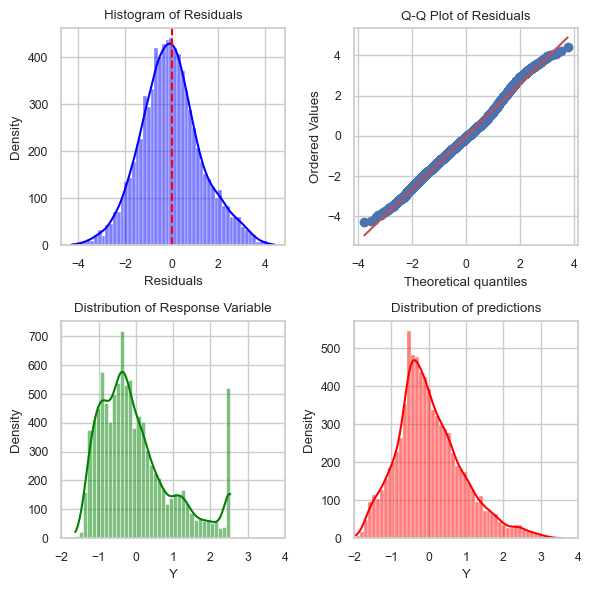

In [ ]:
nam.analytics_plot()

100/100 [==============================] - 0s 904us/step


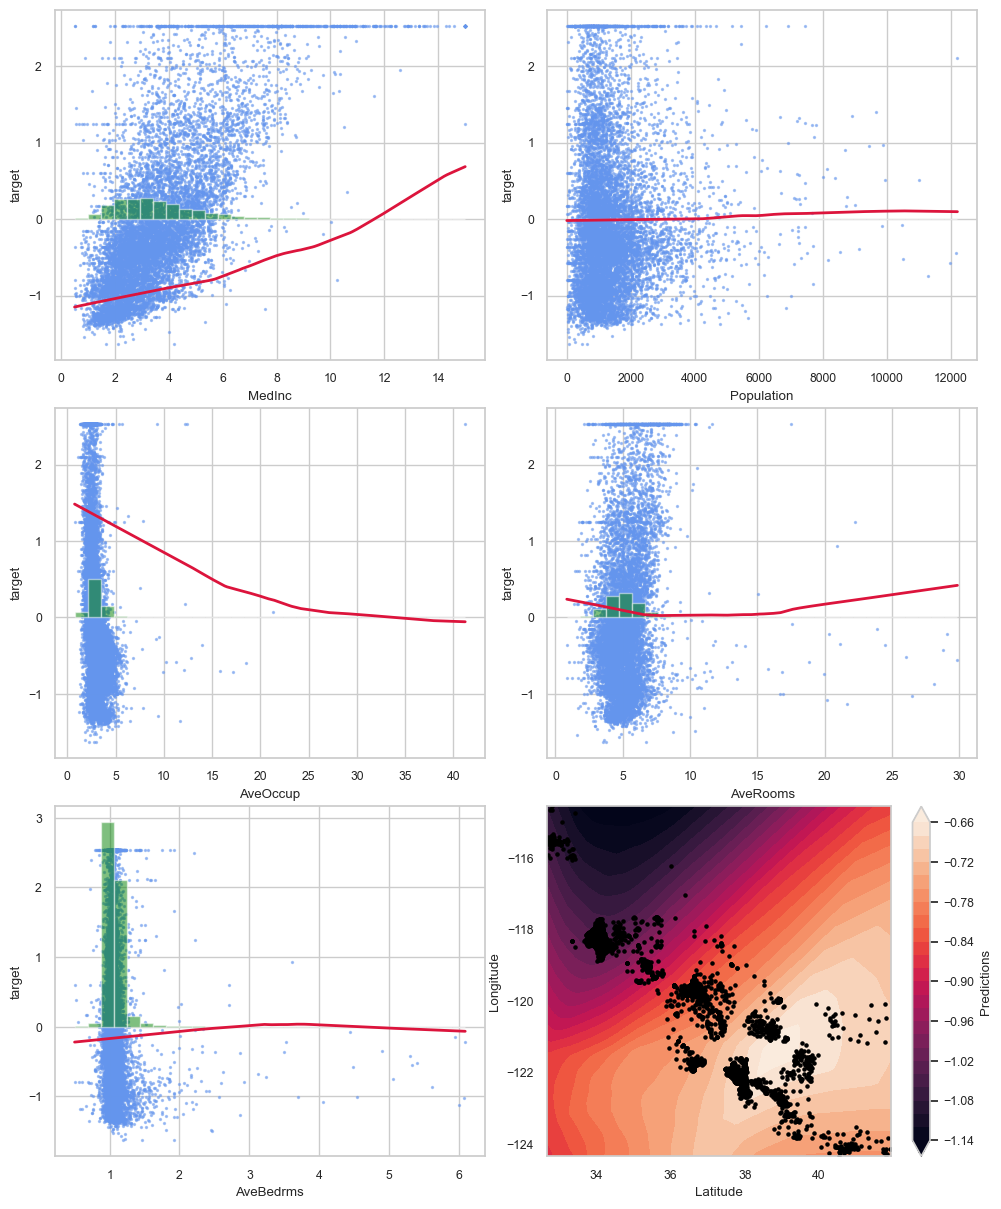

In [ ]:
nam.plot()

In [ ]:
from xDL.models.NAMLSS import NAMLSS

namlss = NAMLSS("target ~  -1 + MLP(MedInc) + MLP(AveOccup) + MLP(AveBedrms)+ MLP(Population)+  MLP(Latitude):MLP(Longitude) + MLP(AveRooms)", data=data, family="Normal", feature_dropout=0.0001)


In [ ]:
def KL_Divergence(y_true, y_hat):

    t = tfd.Normal(loc=y_true, scale=tf.math.reduce_std(y_true))

    p = tfd.Normal(loc=y_hat, scale=tf.math.reduce_std(y_true))
    
    kl = tf.reduce_mean(tfd.kl_divergence(t, p, allow_nan_stats=True))
    return kl

namlss.compile(optimizer=Adam(learning_rate=0.001), loss=namlss.NegativeLogLikelihood, metrics=KL_Divergence)

# Train the model
namlss.fit(namlss.training_dataset, epochs=100, validation_data=namlss.validation_dataset)

# Evaluate the model
loss = namlss.evaluate(namlss.validation_dataset)
print("Test Loss:", loss)

Epoch 1/100
8/8 [==============================] - 7s 96ms/step - loss: 1.2904 - KL_Divergence: 0.7665 - val_loss: 1.0647 - val_KL_Divergence: 0.6678
Epoch 2/100
8/8 [==============================] - 0s 37ms/step - loss: 0.9973 - KL_Divergence: 0.5117 - val_loss: 1.0255 - val_KL_Divergence: 0.4541
Epoch 3/100
8/8 [==============================] - 0s 35ms/step - loss: 0.8630 - KL_Divergence: 0.3840 - val_loss: 0.7869 - val_KL_Divergence: 0.3647
Epoch 4/100
8/8 [==============================] - 0s 39ms/step - loss: 0.7624 - KL_Divergence: 0.3117 - val_loss: 0.7682 - val_KL_Divergence: 0.3212
Epoch 5/100
8/8 [==============================] - 0s 39ms/step - loss: 0.7158 - KL_Divergence: 0.2799 - val_loss: 0.6441 - val_KL_Divergence: 0.2946
Epoch 6/100
8/8 [==============================] - 0s 35ms/step - loss: 0.6784 - KL_Divergence: 0.2857 - val_loss: 0.6074 - val_KL_Divergence: 0.2482
Epoch 7/100
8/8 [==============================] - 0s 30ms/step - loss: 0.6511 - KL_Divergence: 0.27

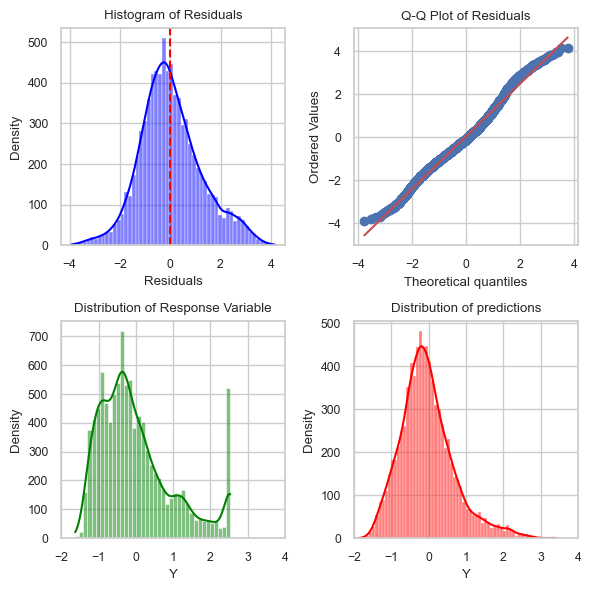

In [ ]:
namlss.analytics_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


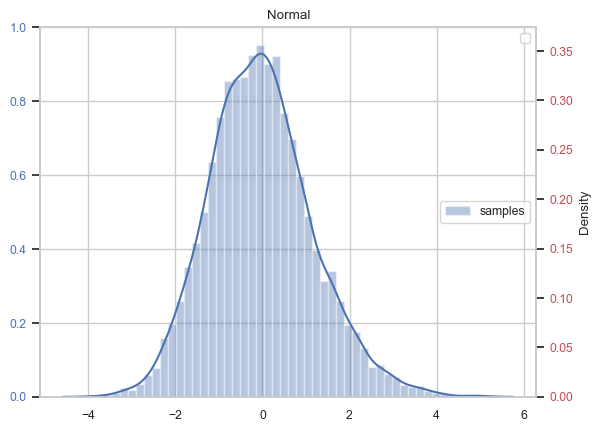

In [ ]:
namlss.plot_dist()

100/100 [==============================] - 0s 2ms/step


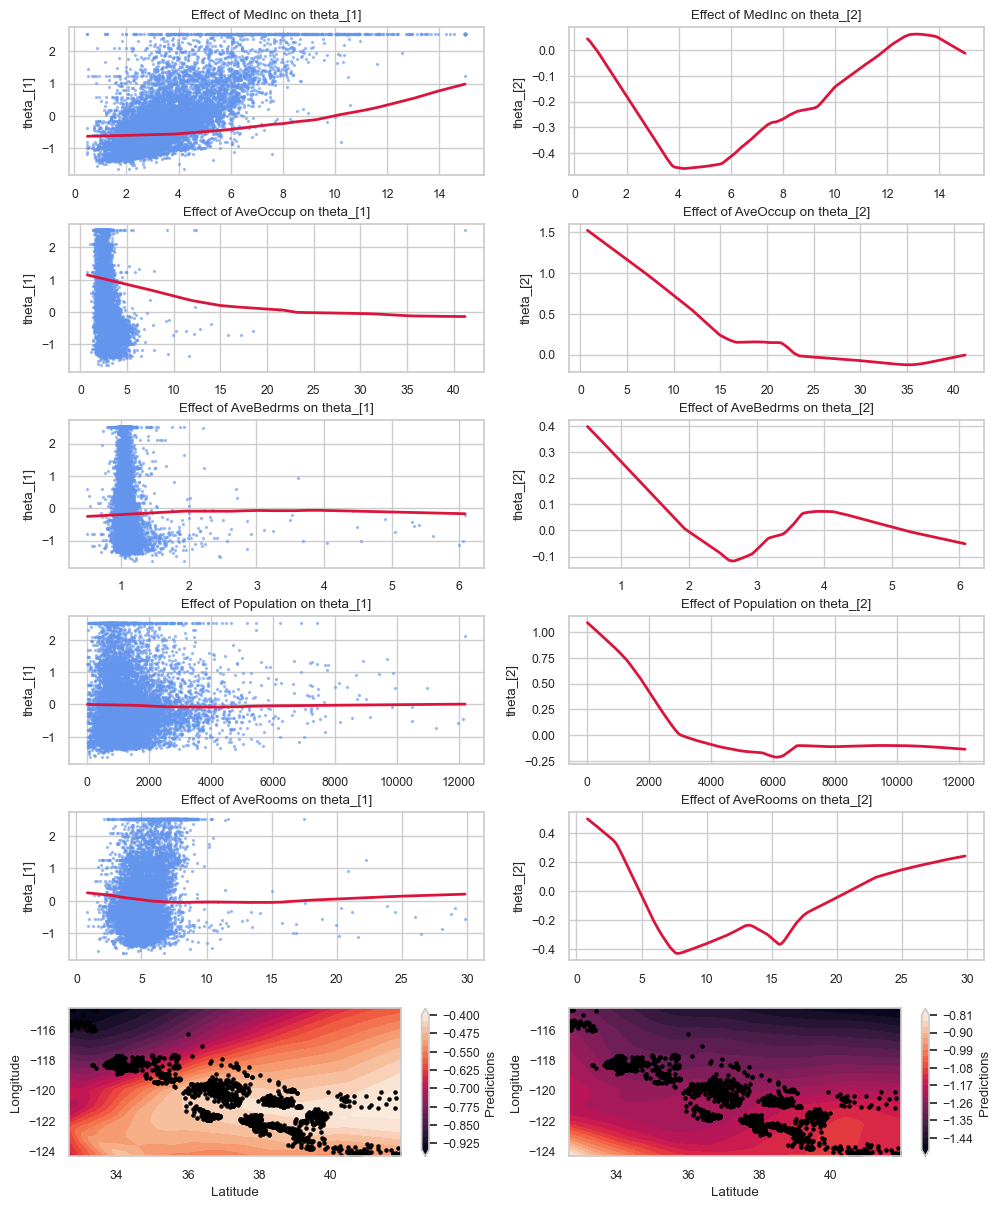

In [ ]:
namlss.plot()

# Test Titanic

In [ ]:
TITANIC = pd.read_csv("TITANIC.csv")

In [ ]:
nam = NAM("survived ~  -1 + MLP(fare) + MLP(n_siblings_spouses) + MLP(age) + MLP(parch) + MLP(sex) + MLP(deck) + MLP(embark_town) + MLP(alone)", data=TITANIC, feature_dropout=0.0001, output_activation="sigmoid")

In [ ]:
nam.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# Train the model
nam.fit(nam.training_dataset, epochs=100, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

Epoch 1/100


1/1 [==============================] - 7s 7s/step - loss: 0.2475 - val_loss: 0.2177
Epoch 2/100
1/1 [==============================] - 0s 49ms/step - loss: 0.2296 - val_loss: 0.2337
Epoch 3/100
1/1 [==============================] - 0s 69ms/step - loss: 0.2213 - val_loss: 0.2208
Epoch 4/100
1/1 [==============================] - 0s 67ms/step - loss: 0.2097 - val_loss: 0.2145
Epoch 5/100
1/1 [==============================] - 0s 71ms/step - loss: 0.2093 - val_loss: 0.1975
Epoch 6/100
1/1 [==============================] - 0s 81ms/step - loss: 0.2050 - val_loss: 0.1909
Epoch 7/100
1/1 [==============================] - 0s 66ms/step - loss: 0.1947 - val_loss: 0.1764
Epoch 8/100
1/1 [==============================] - 0s 60ms/step - loss: 0.1916 - val_loss: 0.1764
Epoch 9/100
1/1 [==============================] - 0s 71ms/step - loss: 0.1878 - val_loss: 0.1813
Epoch 10/100
1/1 [==============================] - 0s 70ms/step - loss: 0.1812 - val_loss: 0.1826
Epoch 11/100
1/1 [===============

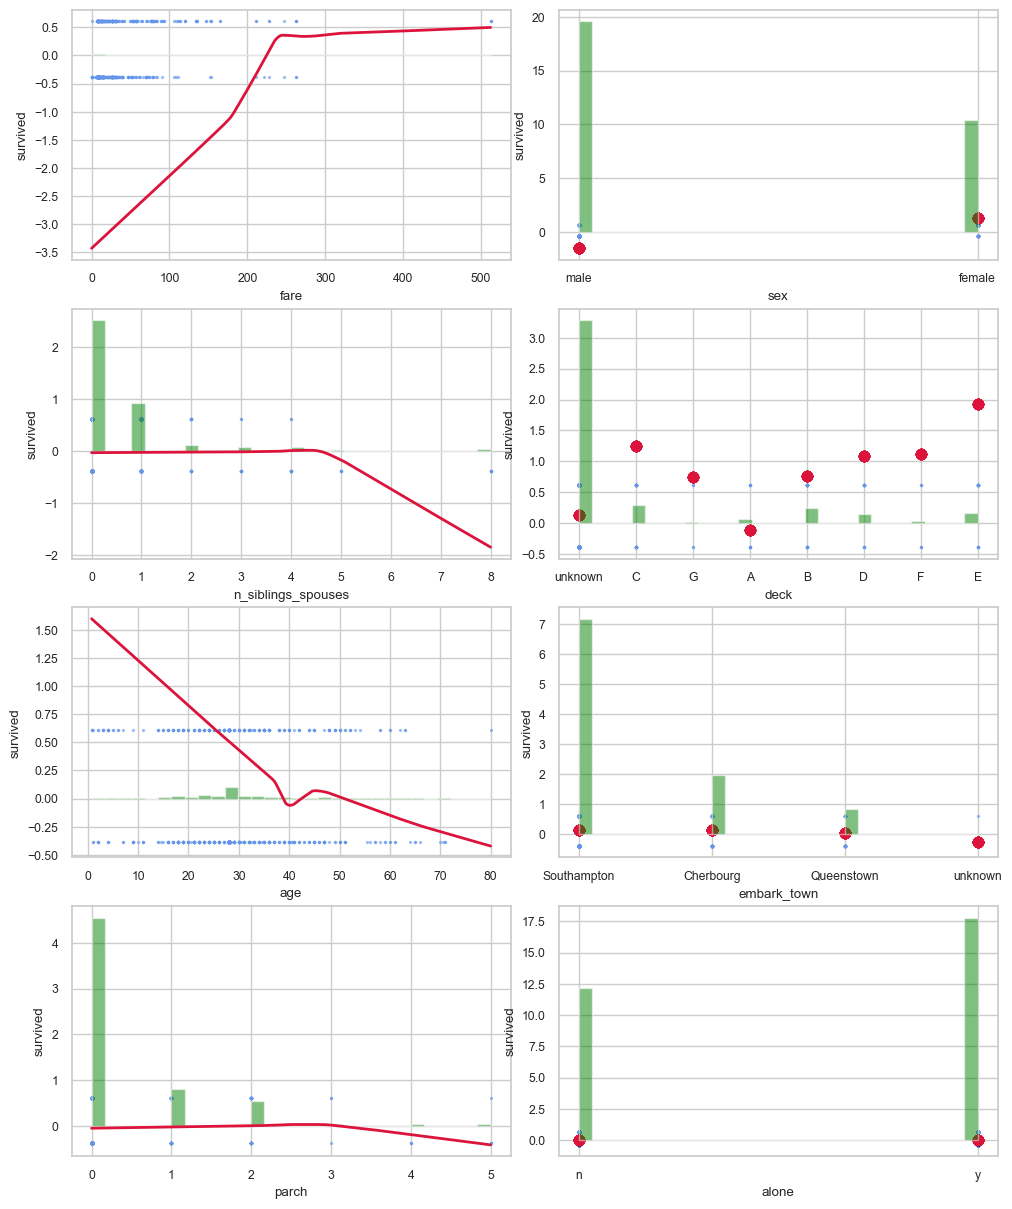

In [ ]:
nam.plot()

In [ ]:
import tensorflow as tf

class PolynomialExpansionLayer(tf.keras.layers.Layer):
    def __init__(self, degree, **kwargs):
        super(PolynomialExpansionLayer, self).__init__(**kwargs)
        self.degree = degree

    def build(self, input_shape):
        super(PolynomialExpansionLayer, self).build(input_shape)

    def call(self, inputs):
        # Assuming inputs is a 2D tensor of shape (batch_size, input_dim)
        x = inputs
        batch_size, input_dim = x.shape

        # Expand the polynomial terms
        polynomial_terms = []
        for d in range(1, self.degree + 1):
            expanded_term = tf.pow(x, d)
            polynomial_terms.append(expanded_term)

        # Concatenate the polynomial terms along the feature dimension
        expanded_features = tf.concat(polynomial_terms, axis=1)

        return expanded_features

    def compute_output_shape(self, input_shape):
        batch_size, input_dim = input_shape
        num_output_features = input_dim * self.degree
        return (batch_size, num_output_features)

# Example usage:
input_tensor = tf.keras.layers.Input(shape=(3,))  # Assuming 3 input features
polynomial_layer = PolynomialExpansionLayer(degree=2)(input_tensor)
model = tf.keras.models.Model(inputs=input_tensor, outputs=polynomial_layer)

# Compile and use the model as needed


4/4 [==============================] - 0s 2ms/step


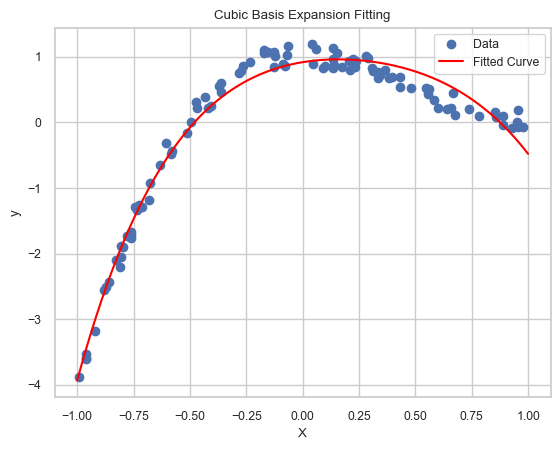

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Simulate data with a cubic relationship
np.random.seed(0)
X = np.random.rand(100, 1) * 2 - 1  # Random values between -1 and 1
y = 2 * X**3 - 3 * X**2 + 1 + 0.1 * np.random.randn(100, 1)  # Cubic relationship with noise

# Create a Keras model with the custom cubic basis expansion layer
input_tensor = tf.keras.layers.Input(shape=(1,))
cubic_expansion_layer = PolynomialExpansionLayer(degree=4)(input_tensor)

output_layer = tf.keras.layers.Dense(1)(cubic_expansion_layer)  # Output layer for regression
model = tf.keras.models.Model(inputs=input_tensor, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the data
history = model.fit(X, y, epochs=1000, verbose=0)

# Plot the data and the fitted curve
X_test = np.linspace(-1, 1, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

plt.scatter(X, y, label='Data')
plt.plot(X_test, y_pred, color='red', label='Fitted Curve')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Cubic Basis Expansion Fitting')
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
from tensorflow.keras.layers.experimental.preprocessing import PreprocessingLayer

class PiecewiseCubicExpansion(tf.keras.layers.Layer):
    def __init__(self, num_knots, **kwargs):
        super(PiecewiseCubicExpansion, self).__init__(**kwargs)
        self.num_knots = num_knots
        

    def build(self, input_shape):
        super(PiecewiseCubicExpansion, self).build(input_shape)
        
        

    @tf.function
    def basis_expansion(self, x):
        self.knots = tf.linspace(tf.reduce_min(x), tf.reduce_max(x), 5)

        n = tf.shape(x)[0]
        
        k = tf.shape(self.knots)[0]
        F = tf.cast(self.get_FS(), dtype=tf.float32)


        base = tnp.zeros((n, k), dtype=tnp.float32)

        x = tf.squeeze(x)

        #for i, val in enumerate(x):
        for i in range(n):
            
            # Find interval in which x[i] lies
            j = tf.argmax(x[i] < self.knots)            
            j = tf.cast(j, dtype=tf.int32)          
            x_j = self.knots[j - 1]        
            x_j1 = self.knots[j]
            h = x_j1 - x_j
            a_jm = (x_j1 - x[i]) / h            
            a_jp = (x[i] - x_j) / h            
            c_jm = ((x_j1 - x[i]) ** 3 / h - h * (x_j1 - x[i])) / 6      
            c_jp = ((x[i] - x_j) ** 3 / h - h * (x[i] - x_j)) / 6 

            values = [c_jm * F[j - 1, :] + c_jp * F[j, :]]
        
            base = tf.tensor_scatter_nd_update(base, indices=[[i]], updates=values)
            indices = tf.convert_to_tensor([[i, j - 1], [i, j]])
            values = tf.convert_to_tensor([a_jm, a_jp], dtype=tf.float32)
            base = tf.tensor_scatter_nd_add(base, indices, values)

        print(base.shape)
        return base

    def call(self, input):
        
        base = self.basis_expansion(input)
        print(base)
        return base


    def get_FS(self):
        """
        Create matrix F required to build the spline base and the penalizing matrix S,
        based on a set of knots self.knots (ascending order).
        Pretty much directly from p.201 in Wood (2017)
        """
        k_tf = self.knots.shape[0]  # Example value for k as a TensorFlow constant
        xk_tf = self.knots  # Create a TensorFlow linspace
        h_tf = tnp.diff(xk_tf) 
        h_shift_up_tf = tf.identity(h_tf)[1:] # Calculate h_tf as the difference between elements of xk_tf
        # Calculate 1/h for the first k-2 elements of h_tf
        inv_h_tf = 1 / h_tf[:k_tf - 2]

        # Create a diagonal matrix with 1/h for the first k-2 elements
        D_tf = tf.linalg.set_diag(tf.zeros((k_tf - 2, k_tf), dtype=tf.float32), inv_h_tf)

        # Update values above the diagonal
        update_values_1 = -1 / h_tf[:k_tf - 2] - 1 / h_shift_up_tf
        update_values_2 =  1 / h_shift_up_tf
        # Multiply the update values by the upper triangular mask and add it to D_tf
        D_tf += tf.linalg.set_diag(tf.zeros((k_tf-2, k_tf), dtype=tf.float32), update_values_1, k=1)

        # Multiply the update values by the upper triangular mask and add it to D_tf
        D_tf += tf.linalg.set_diag(tf.zeros((k_tf-2, k_tf), dtype=tf.float32), update_values_2, k=2)

        B_tf = tnp.zeros((k_tf - 2, k_tf - 2))
        B_tf = tf.linalg.set_diag(tf.zeros((k_tf - 2, k_tf -2), dtype=tf.float32), (h_tf[: k_tf - 2] + h_shift_up_tf) / 3)
        B_tf += tf.linalg.set_diag(tf.zeros((k_tf - 2, k_tf-2), dtype=tf.float32), tf.repeat(h_shift_up_tf[k_tf - 3] / 6, k_tf-3), k=1)
        B_tf += tf.linalg.set_diag(tf.zeros((k_tf - 2, k_tf-2), dtype=tf.float32), tf.repeat(h_shift_up_tf[k_tf - 3] / 6, k_tf-3), k=-1)


        F_minus_tf = tf.linalg.inv(B_tf) @ D_tf
        F_tf = tnp.vstack([tnp.zeros(k_tf), F_minus_tf, tnp.zeros(k_tf)])
        S_tf = tf.transpose(D_tf) @ tf.linalg.inv(B_tf) @ D_tf

        def compute_output_shape(self, input_shape):

        return (10, 5)

        

        return F_tf


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


np.random.seed(0)
X = np.random.rand(10, 1)   # Random values between -1 and 1
y = 2 * X**3 - 3 * X**2 + 1 + 0.1 * np.random.randn(10, 1)  
norm  = tf.keras.layers.Normalization()
norm.adapt(X)
X = norm(X)


cubic_layer = PiecewiseCubicExpansion(5)
X = cubic_layer(X)
print(X)

input_tensor = tf.keras.layers.Input(shape=(5,))

#x = PiecewiseCubicExpansion(5)(x)
output_layer = tf.keras.layers.Dense(1)(input_tensor)  # Output layer for regression
model = tf.keras.models.Model(inputs=input_tensor, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the data
history = model.fit(X, y, epochs=1000, verbose=0)

# Plot the data and the fitted curve
X_test = np.linspace(-1, 1, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

plt.scatter(X, y, label='Data')
plt.plot(X_test, y_pred, color='red', label='Fitted Curve')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Cubic Basis Expansion Fitting')
plt.show()


ValueError: Exception encountered when calling layer 'piecewise_cubic_expansion_113' (type PiecewiseCubicExpansion).

in user code:

    File "C:\Users\anton\AppData\Local\Temp\ipykernel_10832\3244762082.py", line 23, in basis_expansion  *
        F = tf.cast(self.get_FS(), dtype=tf.float32)

    ValueError: None values not supported.


Call arguments received by layer 'piecewise_cubic_expansion_113' (type PiecewiseCubicExpansion):
  • input=tf.Tensor(shape=(10, 1), dtype=float32)

In [ ]:
def get_FS_tf(xk_tf):
    k_tf = tf.constant(5)  # Example value for k as a TensorFlow constant # Create a TensorFlow linspace
    h_tf = tnp.diff(xk_tf) 
    h_shift_up_tf = tf.identity(h_tf)[1:] # Calculate h_tf as the difference between elements of xk_tf
    # Calculate 1/h for the first k-2 elements of h_tf
    inv_h_tf = 1 / h_tf[:k_tf - 2]
    inv_h_tf = tf.cast(inv_h_tf, dtype=tf.float32)
    # Create a diagonal matrix with 1/h for the first k-2 elements
    D_tf = tf.linalg.set_diag(tf.zeros((k_tf - 2, k_tf), dtype=tf.float32), inv_h_tf)
    # Update values above the diagonal
    update_values_1 =  tf.cast(-1 / h_tf[:k_tf - 2] - 1 / h_shift_up_tf, dtype=tf.float32)
    update_values_2 =   tf.cast(1 / h_shift_up_tf, dtype=tf.float32)
    # Multiply the update values by the upper triangular mask and add it to D_tf
    D_tf += tf.linalg.set_diag(tf.zeros((k_tf-2, k_tf), dtype=tf.float32), update_values_1, k=1)
    # Multiply the update values by the upper triangular mask and add it to D_tf
    D_tf += tf.linalg.set_diag(tf.zeros((k_tf-2, k_tf), dtype=tf.float32), update_values_2, k=2)


    B_tf = tnp.zeros((k_tf - 2, k_tf - 2))
    B_tf = tf.linalg.set_diag(tf.zeros((k_tf - 2, k_tf -2), dtype=tf.float32), tf.cast((h_tf[: k_tf - 2] + h_shift_up_tf) / 3, dtype=tf.float32))

    B_tf += tf.linalg.set_diag(tf.zeros((k_tf - 2, k_tf-2), dtype=tf.float32), tf.cast(tf.repeat(h_shift_up_tf[k_tf - 3] / 6, k_tf-3), dtype=tf.float32), k=1)
    B_tf += tf.linalg.set_diag(tf.zeros((k_tf - 2, k_tf-2), dtype=tf.float32), tf.cast(tf.repeat(h_shift_up_tf[k_tf - 3] / 6, k_tf-3), dtype=tf.float32), k=-1)


    F_minus_tf = tf.linalg.inv(B_tf) @ D_tf
    F_tf = tnp.vstack([tnp.zeros(k_tf), F_minus_tf, tnp.zeros(k_tf)])
    S_tf = tf.transpose(D_tf) @ tf.linalg.inv(B_tf) @ D_tf

    return F_tf, S_tf

In [ ]:
def piecewise_cubic_expansion(x, xk):
    n = tf.shape(x)[0]
    k = tf.shape(xk)[0]
    F, S = get_FS(xk)
  
    base = tnp.zeros((n, k), dtype=tnp.float32)
    print(x.shape)

    for i in range(n):
        # Find interval in which x[i] lies
        j = tf.argmax(x[i] < xk)
        j = tf.cast(j, dtype=tf.int32)
        x_j = xk[j - 1]
        x_j1 = xk[j]
        h = x_j1 - x_j
        a_jm = (x_j1 - x[i]) / h
        a_jp = (x[i] - x_j) / h
        c_jm = ((x_j1 - x[i]) ** 3 / h - h * (x_j1 - x[i])) / 6
        c_jp = ((x[i] - x_j) ** 3 / h - h * (x[i] - x_j)) / 6

        values = [c_jm * F[j - 1, :] + c_jp * F[j, :]]
        base = tf.tensor_scatter_nd_update(base, indices=[[i]], updates=values)


        indices = tf.convert_to_tensor([[i, j - 1], [i, j]])
        values = tf.convert_to_tensor([a_jm, a_jp], dtype=tf.float32)
        base = tf.tensor_scatter_nd_add(base, indices, values)



    return base, S, xk, F


base, S, xk, F = piecewise_cubic_expansion(x, tf.linspace(0, 1, 5))
base

(10,)


<tf.Tensor: shape=(10, 5), dtype=float32, numpy=
array([[ 0.32349575,  0.8070862 , -0.16494574,  0.04123643, -0.00687274],
       [-0.00375862,  0.02255174, -0.09020695,  0.34911752,  0.72229636],
       [ 0.00934713, -0.05608279,  0.9843966 ,  0.07467341, -0.01233432],
       [-0.05414286,  0.364632  ,  0.7957684 , -0.12750895,  0.02125149],
       [-0.02437483,  0.9815538 ,  0.05403778, -0.0134601 ,  0.00224335],
       [-0.00297484,  0.01784907, -0.07139628,  1.00421   ,  0.05231209],
       [-0.02668645,  0.16551481,  0.94024265, -0.09488516,  0.01581419],
       [ 0.01999164, -0.11994986,  0.8628745 ,  0.28039813, -0.04331446],
       [ 0.9048226 ,  0.12053379, -0.03202913,  0.00800728, -0.00133455],
       [ 0.02067482, -0.1240489 ,  0.6446163 ,  0.5296728 , -0.07091504]],
      dtype=float32)>

In [ ]:
def get_FS(xk):
    """
    Create matrix F required to build the spline base and the penalizing matrix S,
    based on a set of knots xk (ascending order). Pretty much directly from p.201 in Wood (2017)
    :param xk: knots (for now always np.linspace(x.min(), x.max(), n_knots)
    """
    k = len(xk)
    h = np.diff(xk)
    h_shift_up = h.copy()[1:]

    D = np.zeros((k - 2, k))
    np.fill_diagonal(D, 1 / h[: k - 2])
    np.fill_diagonal(D[:, 1:], (-1 / h[: k - 2] - 1 / h_shift_up))
    np.fill_diagonal(D[:, 2:], 1 / h_shift_up)

    B = np.zeros((k - 2, k - 2))
    np.fill_diagonal(B, (h[: k - 2] + h_shift_up) / 3)
    np.fill_diagonal(B[:, 1:], h_shift_up[k - 3] / 6)
    np.fill_diagonal(B[1:, :], h_shift_up[k - 3] / 6)
    F_minus = np.linalg.inv(B) @ D
    F = np.vstack([np.zeros(k), F_minus, np.zeros(k)])
    S = D.T @ np.linalg.inv(B) @ D
    return F, S



x = np.random.rand(10)
def cr_spl(x, n_knots, xk):
    """

    :param x: x values to be evalutated
    :param n_knots: number of knots
    :return:
    """

    # xk = np.linspace(x.min(), x.max(), n_knots)
    n = len(x)
    k = len(xk)
    F, S = get_FS(xk)

    base = np.zeros((n, k))
    for i in range(0, n):
        # find interval in which x[i] lies
        # and evaluate basis function from p.201 in Wood (2017)
        j = bisect.bisect_left(xk, x[i])
        x_j = xk[j - 1]
        x_j1 = xk[j]
        h = x_j1 - x_j
        a_jm = (x_j1 - x[i]) / h
        a_jp = (x[i] - x_j) / h
        c_jm = ((x_j1 - x[i]) ** 3 / h - h * (x_j1 - x[i])) / 6
        c_jp = ((x[i] - x_j) ** 3 / h - h * (x[i] - x_j)) / 6
        
        base[i, :] = c_jm * F[j - 1, :] + c_jp * F[j, :]

        base[i, j - 1] += a_jm

        base[i, j] += a_jp
    return base, S, xk, F


base, S, xk, F = cr_spl(x, 5, np.linspace(0, 1, 5))
base

array([[ 0.32349576,  0.80708628, -0.16494574,  0.04123643, -0.00687274],
       [-0.00375862,  0.02255174, -0.09020695,  0.34911751,  0.72229633],
       [ 0.00934713, -0.05608279,  0.98439657,  0.07467341, -0.01233432],
       [-0.05414286,  0.36463199,  0.79576833, -0.12750896,  0.02125149],
       [-0.02437482,  0.9815538 ,  0.05403778, -0.0134601 ,  0.00224335],
       [-0.00297484,  0.01784907, -0.07139627,  1.00420996,  0.05231209],
       [-0.02668645,  0.16551481,  0.94024261, -0.09488516,  0.01581419],
       [ 0.01999164, -0.11994986,  0.86287453,  0.28039815, -0.04331446],
       [ 0.90482259,  0.1205338 , -0.03202913,  0.00800728, -0.00133455],
       [ 0.02067482, -0.1240489 ,  0.64461633,  0.52967279, -0.07091503]])